# Data Processing
Using `yfinance` library: https://finance.yahoo.com

In [ ]:
# !pip install backtesting scikit-learn matplotlib yfinance plotly

In [ ]:
# !pip install --upgrade pip

In [ ]:
import yfinance as yf
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import numpy as np
from datetime import datetime
# import nbformat
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from backtesting import Backtest


In [2]:
ticker = 'GOOG'
df_GOOG = yf.download(tickers=ticker)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df_GOOG.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-08-19,2.490185,2.582506,2.381485,2.481747,897427216
2004-08-20,2.687981,2.707090,2.494156,2.506813,458857488
2004-08-23,2.715032,2.816287,2.706346,2.748535,366857939
2004-08-24,2.602608,2.769629,2.570345,2.760696,306396159
2004-08-25,2.630652,2.680287,2.578039,2.604841,184645512


## Flatten column names

In [4]:
df_GOOG.columns = df_GOOG.columns.get_level_values(0)
df_GOOG.reset_index(inplace=True)
df_GOOG.set_index('Date', inplace=True)
df_GOOG.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2004-08-19,2.490185,2.582506,2.381485,2.481747,897427216
2004-08-20,2.687981,2.707090,2.494156,2.506813,458857488
2004-08-23,2.715032,2.816287,2.706346,2.748535,366857939
2004-08-24,2.602608,2.769629,2.570345,2.760696,306396159
2004-08-25,2.630652,2.680287,2.578039,2.604841,184645512


In [5]:
ticker = 'BTC-USD'
df_BTC = yf.download(tickers=ticker)
df_BTC.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [6]:
df_BTC.dtypes

Price   Ticker 
Close   BTC-USD    float64
High    BTC-USD    float64
Low     BTC-USD    float64
Open    BTC-USD    float64
Volume  BTC-USD      int64
dtype: object

In [7]:
type(df_BTC)

pandas.core.frame.DataFrame

In [8]:
# Flatten column names
df_BTC.columns = df_BTC.columns.get_level_values(0) # only have the first level
df_BTC.reset_index(inplace=True) #Date as column
df_BTC.set_index('Date', inplace=True) #Set date back as index
df_BTC.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [9]:
df_BTC.to_csv('data/df_BTC.csv',index=False)

In [10]:
df_GOOG.to_csv('data/df_GOOG.csv',index=False)

## Visualize the data with plotly

[Plotly: Candlestick](https://plotly.com/python/candlestick-charts/)

In [ ]:
# deal with ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed
# !pip install --upgrade nbformat

In [ ]:
# deal with ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed
# import plotly.io as pio
pio.renderers.default = 'browser' #'notebook'

In [12]:
df = df_GOOG

fig = go.Figure(data=[go.Candlestick(x=df.index,#['Date'], #if Date is a column
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [13]:
# Filter from certain date
# August 10, 2015: Announces restructuring as Alphabet Inc.
df_GOOG_alphabet = df_GOOG.loc['2015-08-07':,:].copy() #keeping all columns

## Calculate the percent daily difference for tomorrow

In [64]:
# Percent change from the previous period
df_GOOG_alphabet.Close.pct_change() * 100

Date
2015-08-07         NaN
2015-08-10   -0.247120
2015-08-11    4.268380
2015-08-12   -0.184624
2015-08-13   -0.471544
                ...   
2025-02-10    0.566420
2025-02-11   -0.600420
2025-02-12   -0.876685
2025-02-13    1.321260
2025-02-14   -0.537582
Name: Close, Length: 2396, dtype: float64

Backward looking:
* If the value increases, the result is positive
* If the value decreases, the result is negative


`pct_change` deafult to `1`:
* $pct Change = (current Value - previous Value) / previous Value$ 
* = $current Value / previous Value -1 $

In [14]:
# Percent change to the next row
df_GOOG_alphabet['change_tmr'] = df_GOOG_alphabet.Close.pct_change(-1) * 100 * -1 #to flip backward

Forward-looking: 
* If the next value is lower, the result is positive.
* If the next value is higher, the result is negative.

`pct_change(-1)`: calculate the percentage change to the next row (future value) instead of the previous row
* $pct Change(-1) = (next Value - current Value)/ current Value$ 
* = $future Value / current Value - 1$

But normally we say _"the price increase by x%"_, not _"the past price was x% lower"_, so we mulitply by `-1` to flip it to backward changes
* A future increases now shows as a positive number.
* A futuer decreases now shows as a negative number.


In [65]:
df_GOOG_alphabet.Close

Date
2015-08-07     31.651274
2015-08-10     31.573057
2015-08-11     32.920715
2015-08-12     32.859936
2015-08-13     32.704987
                 ...    
2025-02-10    188.199997
2025-02-11    187.070007
2025-02-12    185.429993
2025-02-13    187.880005
2025-02-14    186.869995
Name: Close, Length: 2396, dtype: float64

In [71]:
df_GOOG_alphabet.tail()

Price,Close,High,Low,Open,Volume,change_tmr
Date,,,,,,
2025-02-10,188.199997,189.990005,187.610001,189.059998,16606000,-0.604046
2025-02-11,187.070007,188.800003,186.080002,186.835007,13028100,-0.884439
2025-02-12,185.429993,186.830002,183.630005,185.229996,17632300,1.304030
2025-02-13,187.880005,187.990005,184.880005,185.929993,12729300,-0.540488
2025-02-14,186.869995,188.149994,186.110001,186.830002,12673300,NaN


In [15]:
df_GOOG_alphabet = df_GOOG_alphabet.dropna().copy() #drop the last row where there's no future data

## Did the stock go up/down

In [16]:
df_GOOG_alphabet['change_tmr_direction'] = np.where(df_GOOG_alphabet['change_tmr'] > 0, 'UP', 'DOWN')

In [74]:
df_GOOG_alphabet['change_tmr_direction'].value_counts()

change_tmr_direction
UP      1302
DOWN    1094
Name: count, dtype: int64

* the stock went up more days than down.

<Axes: xlabel='Date'>

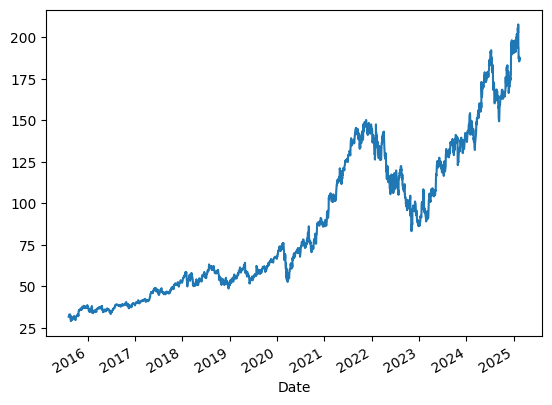

In [79]:
df_GOOG_alphabet.Close.plot()

In [ ]:
# df_GOOG_alphabet.to_csv('data/df_GOOG_alphabet.csv',index=True)

In [85]:
df_GOOG_alphabet.dtypes

Price
Close                   float64
High                    float64
Low                     float64
Open                    float64
Volume                    int64
change_tmr              float64
change_tmr_direction     object
dtype: object

# ML Classification Model
1. Target: Which variable do you want to predict?
2. Explanatory: Which variables will you use to calculate the prediction?

In [ ]:
# df = pd.read_csv('data/df_GOOG_alphabet.csv', parse_dates=['Date'], index_col=0)

* `parse_dates=[column_name]`: converts the specified column(s) to datetime format
* `index_col=0`: uses the first column as the index instead of a regular column

In [17]:
df = df_GOOG_alphabet.copy()

In [18]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'change_tmr',
       'change_tmr_direction'],
      dtype='object', name='Price')

In [19]:
target = df.change_tmr_direction #categories

In [20]:
explanatory = df.drop(columns=['change_tmr', 'change_tmr_direction'])

## Compute the model

In [21]:

model_dt = DecisionTreeClassifier(max_depth=20)#largr tree (eg.15) would improve the model
model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier(max_depth=20)

## Visualize the model

[Text(0.8589543269230769, 0.9761904761904762, 'Volume <= 88546000.0\ngini = 0.496\nsamples = 2395\nvalue = [1093, 1302]'),
 Text(0.7691907051282051, 0.9285714285714286, 'Low <= 29.862\ngini = 0.496\nsamples = 2373\nvalue = [1077, 1296]'),
 Text(0.814072516025641, 0.9523809523809523, 'True  '),
 Text(0.7589342948717949, 0.8809523809523809, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.7794471153846154, 0.8809523809523809, 'High <= 196.598\ngini = 0.496\nsamples = 2367\nvalue = [1077, 1290]'),
 Text(0.6614583333333334, 0.8333333333333334, 'Open <= 191.418\ngini = 0.496\nsamples = 2341\nvalue = [1060, 1281]'),
 Text(0.651201923076923, 0.7857142857142857, 'High <= 188.514\ngini = 0.496\nsamples = 2332\nvalue = [1060, 1272]'),
 Text(0.48701923076923076, 0.7380952380952381, 'Open <= 149.727\ngini = 0.495\nsamples = 2319\nvalue = [1049, 1270]'),
 Text(0.2644230769230769, 0.6904761904761905, 'Close <= 148.71\ngini = 0.497\nsamples = 2136\nvalue = [984, 1152]'),
 Text(0.25416666666666665,

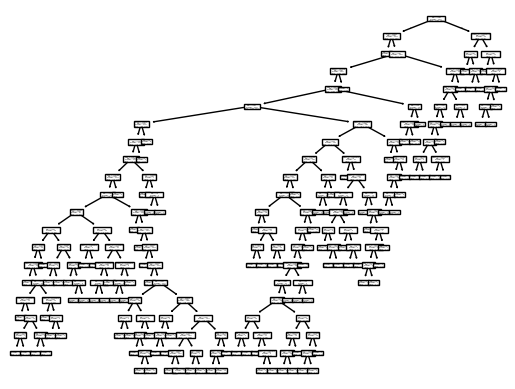

In [ ]:
# from sklearn.tree import plot_tree
plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_)

## Calculate the predictions

In [24]:
y_pred = model_dt.predict(X=explanatory)

In [25]:
df_pred = df[['change_tmr_direction']].copy()
df_pred['prediction'] = y_pred
df_pred

Price,change_tmr_direction,prediction
Date,,
2015-08-07,DOWN,DOWN
2015-08-10,UP,UP
2015-08-11,DOWN,DOWN
2015-08-12,DOWN,DOWN
2015-08-13,UP,UP
...,...,...
2025-02-07,UP,UP
2025-02-10,DOWN,DOWN
2025-02-11,DOWN,DOWN


## Evalute the model

In [ ]:
# df_pred[['change_tmr_direction']]

Price,change_tmr_direction
Date,
2015-08-07,DOWN
2015-08-10,UP
2015-08-11,DOWN
2015-08-12,DOWN
2015-08-13,UP
...,...
2025-02-10,DOWN
2025-02-11,DOWN
2025-02-12,UP


In [ ]:
# df_pred.change_tmr_direction

Date
2015-08-07    DOWN
2015-08-10      UP
2015-08-11    DOWN
2015-08-12    DOWN
2015-08-13      UP
              ... 
2025-02-10    DOWN
2025-02-11    DOWN
2025-02-12      UP
2025-02-13    DOWN
2025-02-14    DOWN
Name: change_tmr_direction, Length: 2396, dtype: object

In [ ]:
# df_pred['change_tmr_direction']

Date
2015-08-07    DOWN
2015-08-10      UP
2015-08-11    DOWN
2015-08-12    DOWN
2015-08-13      UP
              ... 
2025-02-10    DOWN
2025-02-11    DOWN
2025-02-12      UP
2025-02-13    DOWN
2025-02-14    DOWN
Name: change_tmr_direction, Length: 2396, dtype: object

In [26]:
cf = df_pred['change_tmr_direction'] == df_pred['prediction'] # or df_pred.prediciton
cf.sum()

np.int64(1495)

In [27]:
cf.sum() / len(df_pred) *100

np.float64(62.421711899791234)

* We got 55.80% of prediction correct.

In [28]:
model_dt.score(X=explanatory, y=target) #got the accuracy of ml model

0.6242171189979123

## Save the model into a file
Write the model's mathematical equation into a file

In [ ]:
import os
# os.makedirs('models')

In [ ]:
import pickle
with open('models/model_dt_classification.pkl', 'wb') as f:#wb as writing
    pickle.dump(model_dt, f)

# Backtesting ML Classification
`backtesting`

In [31]:
with open('models/model_dt_classification.pkl', 'rb') as f:#rb as reading
    model_dt = pickle.load(f)

In [32]:
model_dt

DecisionTreeClassifier(max_depth=20)

In [33]:
df_GOOG_alphabet

Price,Close,High,Low,Open,Volume,change_tmr,change_tmr_direction
Date,,,,,,,
2015-08-07,31.651274,32.018952,31.372775,31.896893,28078000,-0.247738,DOWN
2015-08-10,31.573055,32.056817,31.449449,31.859526,36184000,4.093643,UP
2015-08-11,32.920712,33.624181,32.596376,33.340202,100584000,-0.184966,DOWN
2015-08-12,32.859932,33.130957,32.497731,33.035301,58734000,-0.473767,DOWN
2015-08-13,32.704987,33.106046,32.466395,32.848073,36214000,0.101967,UP
...,...,...,...,...,...,...,...
2025-02-07,187.139999,193.014999,185.100006,192.740005,29565700,0.563229,UP
2025-02-10,188.199997,189.990005,187.610001,189.059998,16606000,-0.604046,DOWN
2025-02-11,187.070007,188.800003,186.080002,186.835007,13028100,-0.884439,DOWN


In [38]:
df_explanatory = df_GOOG_alphabet.drop(columns=['change_tmr', 'change_tmr_direction'])

Testing:

In [39]:
model_dt.predict(X=df_explanatory)

array(['DOWN', 'UP', 'DOWN', ..., 'DOWN', 'UP', 'DOWN'],
      shape=(2395,), dtype=object)

In [43]:
df_explanatory.iloc[-1,:]#return a series

Price
Close     1.878800e+02
High      1.879900e+02
Low       1.848800e+02
Open      1.859300e+02
Volume    1.272930e+07
Name: 2025-02-13 00:00:00, dtype: float64

In [44]:
# the last row
explanatory_td = df_explanatory.iloc[[-1],:]#return a df

In [47]:
# get today's predicted element
forcast_tmr = model_dt.predict(explanatory_td)[0] #without [0] would be array

## Calculate Purchase Recommendation
Buy if it goes up:

In [49]:
# create empty list
list_buy_sell = []

# for loop
for tmr_direction in df_GOOG_alphabet.change_tmr_direction:
    if tmr_direction == 'UP':
        list_buy_sell.append(1)
    elif tmr_direction == 'DOWN':
        list_buy_sell.append(-1)

In [50]:
df_GOOG_alphabet['buy_sell'] = list_buy_sell
df_GOOG_alphabet[['change_tmr_direction','buy_sell']].head()

Price,change_tmr_direction,buy_sell
Date,,
2015-08-07,DOWN,-1
2015-08-10,UP,1
2015-08-11,DOWN,-1
2015-08-12,DOWN,-1
2015-08-13,UP,1


Buy if it's UP and sell if it's DOWN.

---
But you can only sell you have already bought:

In [51]:
# create empty list
list_buy_sell = []
already_bought = False

# for loop
for tmr_direction in df_GOOG_alphabet.change_tmr_direction:
    if tmr_direction == 'UP' and already_bought == False:
        list_buy_sell.append(1)
        already_bought = True
    elif tmr_direction == 'DOWN' and already_bought == True:
        list_buy_sell.append(-1)
        already_bought = False
    else:
        list_buy_sell.append(0)

In [52]:
df_GOOG_alphabet['buy_sell'] = list_buy_sell
df_GOOG_alphabet[['change_tmr_direction','buy_sell']].head()

Price,change_tmr_direction,buy_sell
Date,,
2015-08-07,DOWN,0
2015-08-10,UP,1
2015-08-11,DOWN,-1
2015-08-12,DOWN,0
2015-08-13,UP,1


In [37]:
from backtesting import Backtest, Strategy

In [61]:
class ClassificationUp(Strategy):
    # initial objects that will use in our investment strategy
    def init(self):
        self.model = model_dt
        self.already_bought = False
    
    # prediction on the last day
    def next(self):
        explanatory_td = self.data.df.iloc[[-1],:] #df_explanatory.iloc[[-1],:]
        forecast_tmr = model_dt.predict(explanatory_td)[0]
        
        # condition to sell or buy
        if forecast_tmr == 'UP' and self.already_bought == False:
            self.buy() #in place of: list_buy_sell.append(1)
            self.already_bought = True
        elif forecast_tmr == 'DOWN' and self.already_bought == True:
            self.sell() #list_buy_sell.append(-1)
            self.already_bought = False
        else:
            pass #list_buy_sell.append(0) #ie. don't take any action

* `ClassificationUp` the name of the backtesting strategy
* Which must contains 

## Define initial conditions

In [62]:
bt = Backtest(data= df_explanatory, strategy= ClassificationUp,
              cash=10000, commission=.002, exclusive_orders=True)

* cash: your initial investment $10,000

## Run backtesting

In [63]:
results = bt.run()

## Interpret backtseting results

In [64]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2015-08-07 00:00:00
End,2025-02-13 00:00:00
Duration,3478 days 00:00:00
Exposure Time [%],99.916493
Equity Final [$],364418.973924
Equity Peak [$],398308.311102
Commissions [$],111371.830953
Return [%],3544.189739


* Start & End Date: the first and last date of the backtest
* Duration: total number of days covered in the test
* Exposure time: measures how often the strategy was invested (holding a position; being active)
    * If 0%, it means your strategy never bought anything, and it stayed 100% in cash
* Equity Final [$]: the final portfolio value at the end (the higher the better)
* Return [%]: total percentage return of the strategy